In [1]:
#Import the necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Read the data as a data frame

df = pd.read_csv('C:\\Users\\admin\\Downloads\\bank-full.csv')

# EDA

In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
#Shape of the data

print(df.shape)
print(df.size)

(45211, 17)
768587


In [6]:
#Data type of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#Checking the presence of missing values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
#5 point summary of numerical attributes

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
#There are 3766 records with negative balance,which is not possible,as balance cannot be negative.Hence we need to clean them.

df[df['balance'] < 0]['balance'].count()

3766

In [10]:
df['balance'] = df["balance"].mean()

In [11]:
df[df['balance'] < 0]['balance'].count()

0

In [12]:
df['pdays'].replace(-1,999, inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,1362.272058,yes,no,unknown,5,may,261,1,999,0,unknown,no
1,44,technician,single,secondary,no,1362.272058,yes,no,unknown,5,may,151,1,999,0,unknown,no
2,33,entrepreneur,married,secondary,no,1362.272058,yes,yes,unknown,5,may,76,1,999,0,unknown,no
3,47,blue-collar,married,unknown,no,1362.272058,yes,no,unknown,5,may,92,1,999,0,unknown,no
4,33,unknown,single,unknown,no,1362.272058,no,no,unknown,5,may,198,1,999,0,unknown,no


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,1.061876e+01,18.000000,33.000000,39.000000,48.000000,95.000000
balance,45211.0,1362.272058,8.981360e-10,1362.272058,1362.272058,1362.272058,1362.272058,1362.272058
day,45211.0,15.806419,8.322476e+00,1.000000,8.000000,16.000000,21.000000,31.000000
duration,45211.0,258.163080,2.575278e+02,0.000000,103.000000,180.000000,319.000000,4918.000000
campaign,45211.0,2.763841,3.098021e+00,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,45211.0,857.565283,3.032457e+02,1.000000,999.000000,999.000000,999.000000,999.000000
previous,45211.0,0.580323,2.303441e+00,0.000000,0.000000,0.000000,0.000000,275.000000


In [14]:
# Replace unknown in each column to the most frequent in that column.

d2 = df
unknown = {"job": {"unknown": "admin."},
          "marital": {"unknown": "married"},
          "education": {"unknown": "university.degree"},
          "default": {"unknown": "no"},
          "housing": {"unknown": "yes"},
          "loan": {"unknown": "no"},
          "contact": {"unknown": "cellular"},
          "poutcome": {"unknown": "other"}}

d2.replace(unknown,inplace = True)

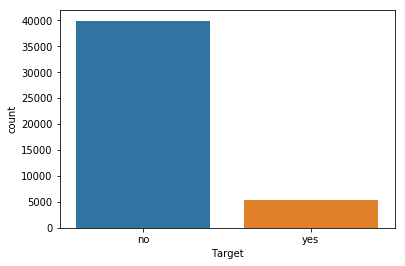

In [15]:
sns.countplot(x='Target',data=df)

#Observation - So, dataset has vast difference of target variable deposit yes or no.

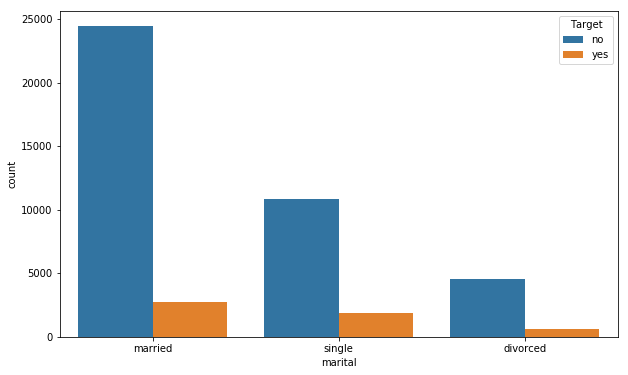

In [16]:
#plot the graphs of different variable to see the distributions.

plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='Target', data=df)
plt.show()

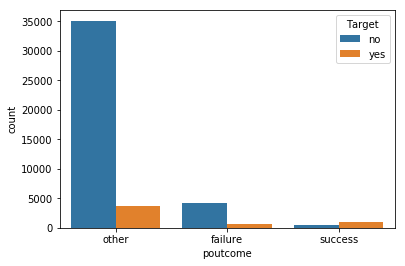

In [17]:
sns.countplot(x='poutcome', hue='Target', data=df)
plt.show()

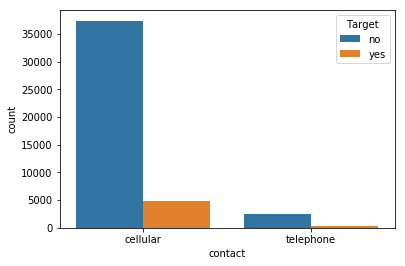

In [18]:
sns.countplot(x='contact', hue='Target', data=df)
plt.show()

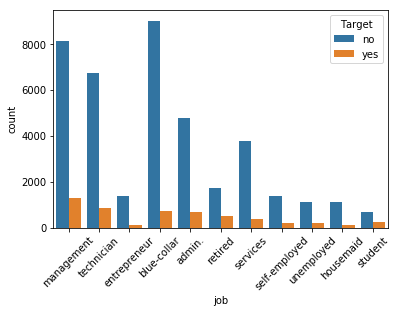

In [19]:
plt.xticks(rotation=45)
sns.countplot(x='job', data=df, hue='Target')

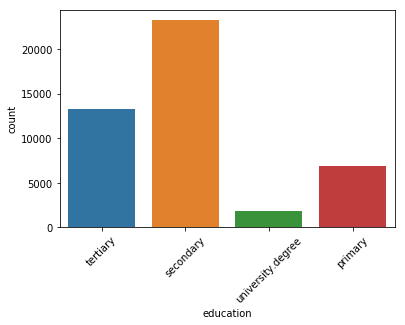

In [20]:
plt.xticks(rotation=45)
sns.countplot(x='education', data=df)

Observations from the diagrams we can tell that according to our dataset:

Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
'Single' customers are less likely to subscribe for term deposit.
Customers with 'telephone' type of contact are less likely to subscribe for term deposit.
It seems that people who have secondary education have mostly subscribed to term deposit scheme where as university degree and primary education holder have comparatively very low in subscribing term deposit scheme.

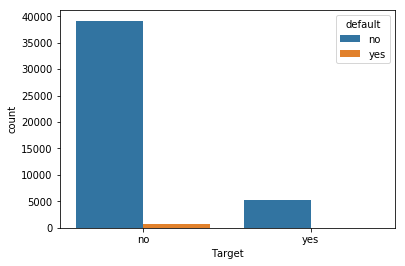

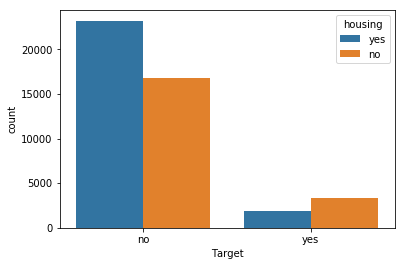

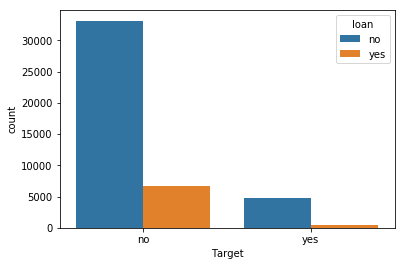

In [21]:
sns.countplot(x='Target',hue='default', data=df)
plt.show()
sns.countplot(x= 'Target',hue='housing', data=df)
plt.show()
sns.countplot(x='Target',hue='loan', data=df)
plt.show()

Observations from above distributions:

It seems more customers who have already subscribed term deposit of the bank but not taken housing loan, so bank can target these customers by offering housing loan to them.
Whereas in case of those customers who have already taken housing loan from the bank but not subscribed to term deposit scheme of the bank. In this case bank can offer term deposit scheme to those customers who have taken housing loan from bank.

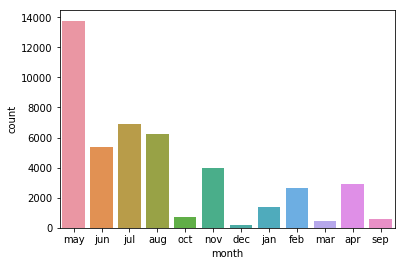

In [22]:
sns.countplot(x='month', data=df)

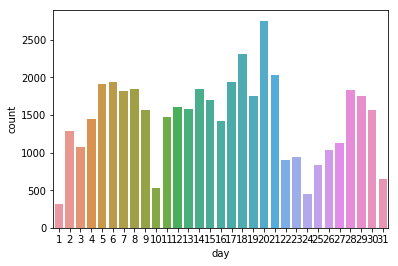

In [23]:
sns.countplot(x='day', data=df)

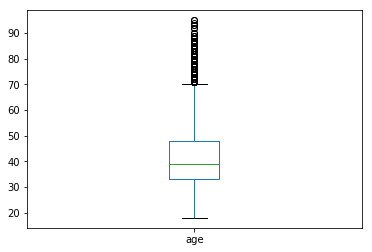

In [24]:
# Checking Outliers

df.age.plot(kind='box')

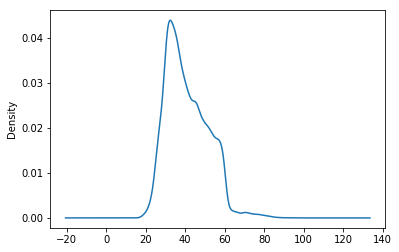

In [25]:
df.age.plot(kind='kde')

#Observation-It seems from the above plot that the age group 20 - 60 have most of the data.

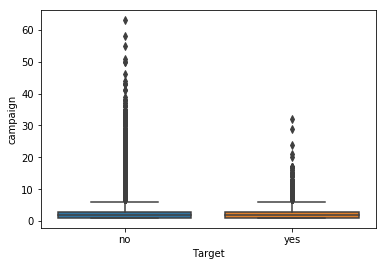

In [26]:
sns.boxplot(x='Target', y='campaign', data=df);

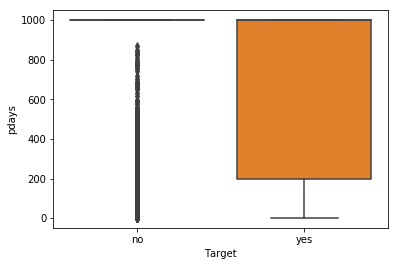

In [27]:
sns.boxplot(x='Target',y='pdays', data=df)

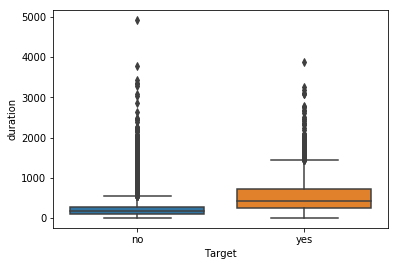

In [28]:
sns.boxplot(x='Target', y='duration', data=df);

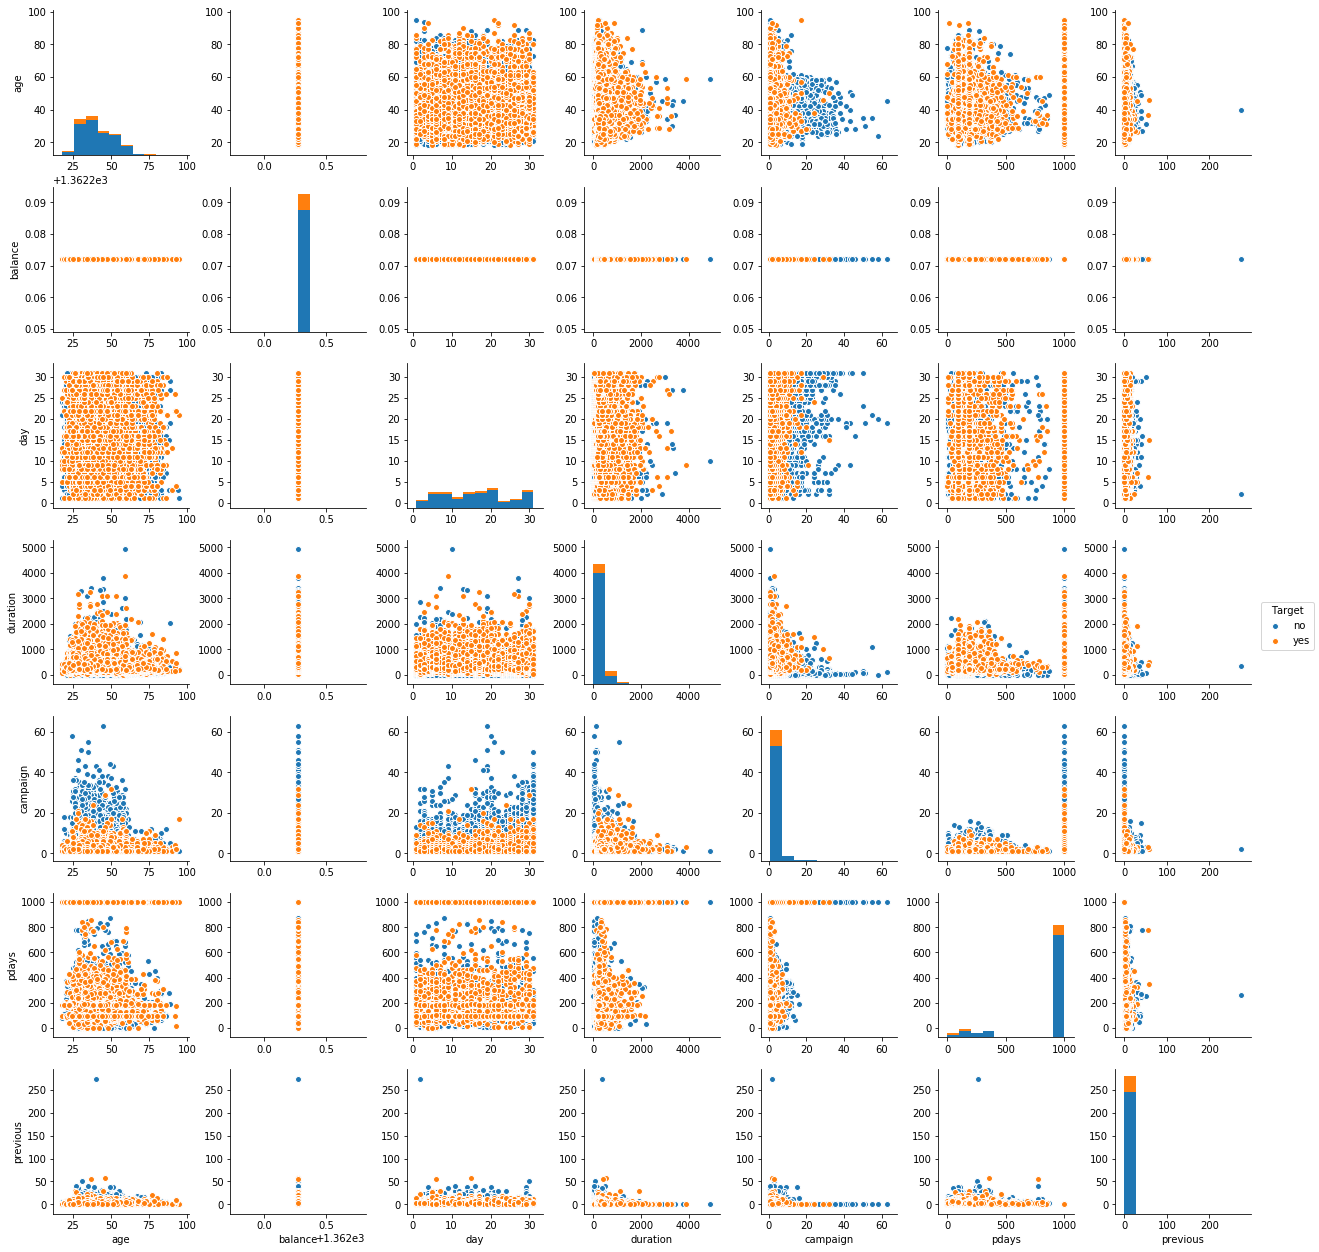

In [29]:
sns.pairplot(df, hue='Target')

Observations from above pairplot:

1.People who subscribed for term deposit tend to have greater balance.
2.The age distribution above tells us that there are very few participants over age 60.

In [30]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000e+00,6.686172e-15,-9.120046e-03,-4.648428e-03,4.760312e-03,-8.804354e-03,1.288319e-03
balance,6.686172e-15,1.000000e+00,-6.361807e-14,-6.805119e-15,6.453762e-14,2.645447e-13,6.776718e-14
day,-9.120046e-03,-6.361807e-14,1.000000e+00,-3.020634e-02,1.624902e-01,7.907367e-02,-5.171050e-02
duration,-4.648428e-03,-6.805119e-15,-3.020634e-02,1.000000e+00,-8.456950e-02,-5.090193e-03,1.203057e-03
campaign,4.760312e-03,6.453762e-14,1.624902e-01,-8.456950e-02,1.000000e+00,1.083064e-01,-3.285529e-02
pdays,-8.804354e-03,2.645447e-13,7.907367e-02,-5.090193e-03,1.083064e-01,1.000000e+00,-5.289098e-01
previous,1.288319e-03,6.776718e-14,-5.171050e-02,1.203057e-03,-3.285529e-02,-5.289098e-01,1.000000e+00


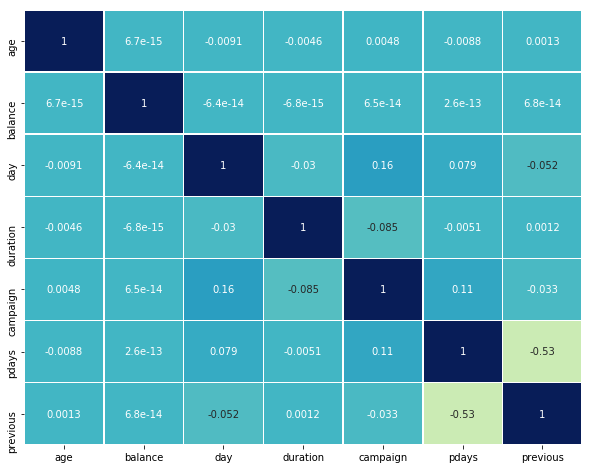

In [31]:
# Correlation

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [32]:
df= df.drop(['duration'], axis=1, inplace=True)

In [33]:
# Converting Categorical to Numeric variables.

labelencoder_X = LabelEncoder()
d2.job = labelencoder_X.fit_transform(d2.job)
d2.marital = labelencoder_X.fit_transform(d2.marital)
d2.default = labelencoder_X.fit_transform(d2.default)
d2.housing = labelencoder_X.fit_transform(d2.housing)
d2.loan = labelencoder_X.fit_transform(d2.loan)
d2.contact = labelencoder_X.fit_transform(d2.contact)
d2.month = labelencoder_X.fit_transform(d2.month)
d2.poutcome = labelencoder_X.fit_transform(d2.poutcome)
d2.education = labelencoder_X.fit_transform(d2.education)

In [34]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 52), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 52) & (dataframe['age'] <= 72), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 72) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

In [35]:
age(d2).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,1362.272058,1,0,0,5,8,1,999,0,1,no
1,2,9,2,1,0,1362.272058,1,0,0,5,8,1,999,0,1,no
2,2,2,1,1,0,1362.272058,1,1,0,5,8,1,999,0,1,no
3,2,1,1,3,0,1362.272058,1,0,0,5,8,1,999,0,1,no
4,2,0,2,3,0,1362.272058,0,0,0,5,8,1,999,0,1,no


In [36]:
d2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,1362.272058,1,0,0,5,8,1,999,0,1,no
1,2,9,2,1,0,1362.272058,1,0,0,5,8,1,999,0,1,no
2,2,2,1,1,0,1362.272058,1,1,0,5,8,1,999,0,1,no
3,2,1,1,3,0,1362.272058,1,0,0,5,8,1,999,0,1,no
4,2,0,2,3,0,1362.272058,0,0,0,5,8,1,999,0,1,no


In [37]:
# Transform "Target" variable to dummy\int variables.

d2.Target.value_counts()
d2.Target= labelencoder_X.fit_transform(d2.Target)

In [38]:
d2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,1362.272058,1,0,0,5,8,1,999,0,1,0
1,2,9,2,1,0,1362.272058,1,0,0,5,8,1,999,0,1,0
2,2,2,1,1,0,1362.272058,1,1,0,5,8,1,999,0,1,0
3,2,1,1,3,0,1362.272058,1,0,0,5,8,1,999,0,1,0
4,2,0,2,3,0,1362.272058,0,0,0,5,8,1,999,0,1,0


In [39]:
d2.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
balance      float64
housing        int64
loan           int64
contact        int64
day            int64
month          int64
campaign       int64
pdays          int64
previous       int64
poutcome       int64
Target         int64
dtype: object

# Split Dataset into Training and Test

In [45]:
# Split Dataset into Training and Test

X = d2.drop(['Target'], axis=1)
y = d2['Target']

In [46]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [47]:
# Splitting data into 70:30 training:testing respectively.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [48]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Create the decision tree model using “entropy” method of finding the split columns and fit it to training data

In [49]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index. Restricting the depth of the tree to 5 (Random)

model_entropy=DecisionTreeClassifier(criterion='entropy')

In [50]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Print the accuracy of the model & print the confusion matrix.

In [51]:
model_entropy.score(X_train, y_train)  # performance on train data

0.9834739469775966

In [52]:
model_entropy.score(X_test, y_test)  # performance on test data

0.84702152757298732

There is a high degree of overfitting in the model due to which the test accuracy drops drastically.
Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [53]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

# Visualizing the Tree

In [54]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [56]:
xvar = d2.drop('Target', axis=1)
feature_cols = xvar.columns

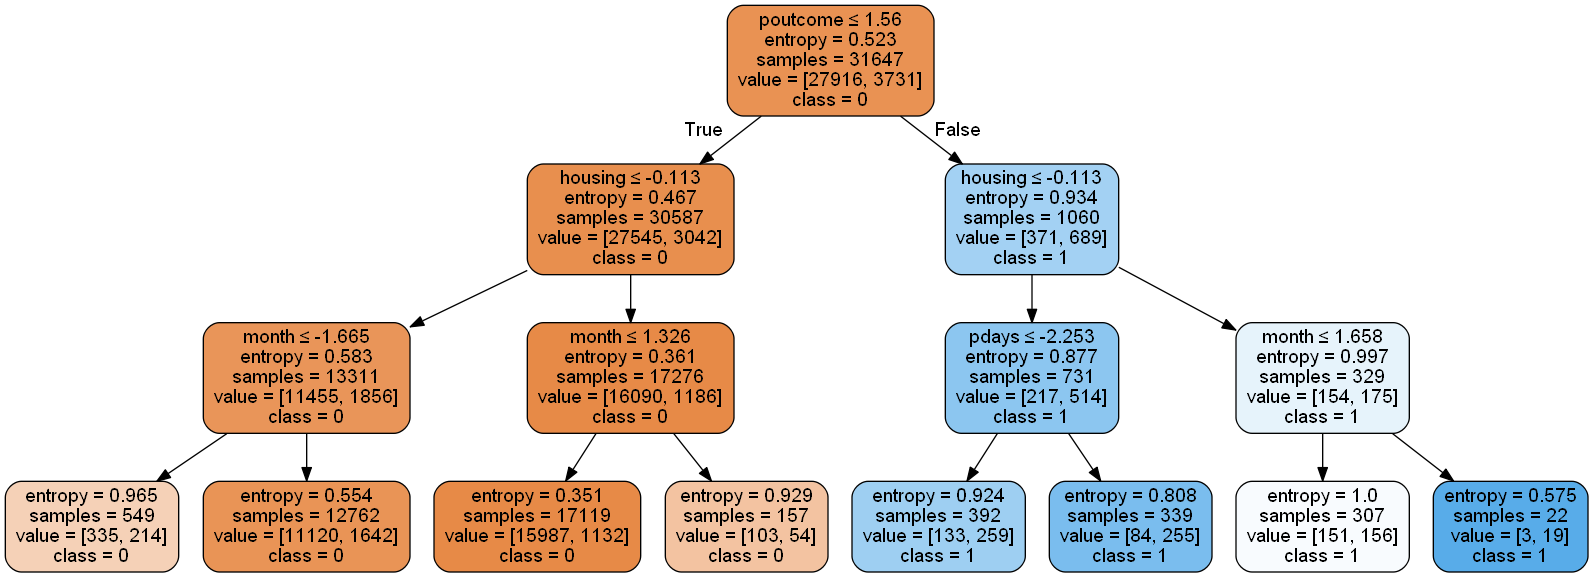

In [57]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank_markt.png')
Image(graph.create_png())

In [58]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [59]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.894500147449
0.892154074636


In [60]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [61]:
# Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome,0.691429
housing,0.173953
month,0.131752
pdays,0.002867
age,0.000000
job,0.000000
marital,0.000000
education,0.000000
default,0.000000
balance,0.000000


From the feature importance dataframe we can infer that poutcome,housing,month and pdays are the variables that impact term deposit.

In [62]:
#Store the accuracy results for each model in a dataframe for final comparison.

resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.8945


# Apply the Random forest model and print the accuracy of Random forest Model

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [64]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [65]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.894500
0,Random Forest,0.881746


# Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [66]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [67]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [68]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.894500
0,Random Forest,0.881746
0,Adaboost,0.895164


# Apply Bagging Classifier Algorithm and print the accuracy.

In [69]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [70]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [71]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.894500
0,Random Forest,0.881746
0,Adaboost,0.895164
0,Bagging,0.883515


# Apply GradientBoost Classifier Algorithm for the same data and print the accuracy.

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [73]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [74]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.894500
0,Random Forest,0.881746
0,Adaboost,0.895164
0,Bagging,0.883515
0,Gradient Boost,0.896196


For this dataset, Boosting models and Decision Tree give the best results on test predictions.